## Chapter 9 - Clustering Methods

In $k$-means clustering, we need to specify the number of clusters $k$ before running the algorithm ($k$ is thought to be the hyperparameter of this algorithm). <u>Hierarchical clustering</u> is an alternative approach which does not require us to commit to a particular choice of $k$. Also, hierarchical clustering results in an easy-to-interpret tree-based representation of the observations called a <u>dendrogram</u>.

### Interpreting a Dendrogram

Consider a dataset with 45 observations in a 2-dimensional space. We aim to perform hierarchical clustering of the data. The following is the scatterplot of the observations.

<img src="0901.png" width="300" />

The following is how the dataset is visualised in a dendrogram. Each observation is represented as a leaf at the bottom of the tree. As we traverse up the tree, leaves fuse to form a branch. As we continue to traverse up, branches & leaves fuse further. Observations that fuse at the lower levels of the tree are quite similar while observations that fuse at the higher levels of the tree are quite different. Specifically, the height where the observation fuses, measure by the position on the $y$-axis, indicates how different the two observations are. 

<img src="0903.png" width="150" />

To identify clusters using the dendrogram, we make a horizontal cut across the dendrogram The observations that belong to each branch is interpreted as one cluster. 

<img src="0902.png" width="300" />

Observe that when we cut at position 9, we obtain two clusters, while if we cut at position 5, we get three clusters. As we cut at a lower position, we obtain more clusters. In other words, the height to cut the dendrogram serves the same role as determining $k$ in $k$-means clustering.

Hierarchical clustering is named as the clusters obtained by cutting the dendrogram at a given height are nested within the clusters obtained by cutting the dendrogram at a greater height. (Using this example, the clusters obtained at height 5 will fuse to a smaller number of clusters obtained at height 9). However, the assumption of a hierarchical structher might be unrealistic. Clusters could be created by slicing and dicing the data across features (e.g. gender, followed by race). Hence, sometimes hierarchical clustering might yield worse results than $k$-means clustering.

### The Hierarchical Clustering Algorithm

Before we run the algorithm, we define a dissimilarity measure between each pair of observations. Usually Euclidean measure is used. Then, from the bottom of the dendrogram, each of the $n$ observations is treated as its own cluster. The two clusters most similar to each other are then fused to form $n-1$ clusters. Then, the next two clusters most similar to each other are fused to form $n-2$ clusters. This proceeds until all observations are fused to form one cluster. Then the dendrogram is complete. The following is an example of the first few steps of the clustering.

<img src="0904.png" width="900" />

Dissimilarity needs to be extended to beyond a pair of observations to a pair of groups (of observations). This extends dissimilarity to the idea of linkage, which defines the dissimilarity between two groups of observations. The four common types of linkage are complete, average, single and centroid, and also Ward from SKLearn.

- Complete: Compute the pairwise dissimilarity for each observation in cluster $A$ and cluster $B$. Record the largest of the dissimilarities.
- Single: Compute the pairwise dissimilarity for each observation in cluster $A$ and cluster $B$. Record the smallest of the dissimilarities.
- Average: Compute the pairwise dissimilarity for all observations in cluster $A$ and cluster $B$. Record the average of the dissimilarities.
- Centroid: Compute and record the dissimilarity for the centroid of cluster $A$ and the centroid of cluster $B$.
- Ward: The distance between cluster $A$ and $B$ is measured as the amount the RSS will increase after they are merged. Find the centroids of clusters $A$ and $B$ respectively and sum the distance between each observation to their respective clusters to find $\sum_{A} + \sum_{B}$. Then, find the centroid of $A \cup B$. Sum the distance between all observations to this centroid to get $\sum_{A\cup B}$. Record the increase in distance i.e. $\sum_{A\cup B} - (\sum_{A} + \sum_{B})$

The algorithm to use for hierarchical clustering is:
```comments

1. Begin with n observations and a measure (e.g. Euclidean distance)> Calculate the pairwise distance 
between all n(n-1) pairs of observation. Treat each observation as 1 cluster

2. iterate until there is 1 cluster:
    1. Find all pairwise intercluster dissimilarities and find the pair of clusters that is least similar
    2. Fuse these clusters together
```

In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

def load(fname):
    mnist = None
    try:
        with open(fname, 'rb') as f:
            mnist = pickle.load(f)
            return mnist
    except FileNotFoundError:
        from sklearn.datasets import fetch_openml
        mnist = fetch_openml('mnist_784', version=1, cache=True)
        with open(fname, 'wb') as f:
            mnist = pickle.dump(mnist, f)
        return mnist

In [2]:
# Ingest
mnist_data = load('mnist.data.pkl')
X, y = mnist_data['data'], mnist_data['target']
y_int = y.astype(int)

# Filter for only 2 and 7
y_2_idx = (y_int == 2)
y_7_idx = (y_int == 7)
X_2 = X[np.where(y_2_idx)]
X_7 = X[np.where(y_7_idx)]
lbl_2 = np.ones(X_2.shape[0])*2
lbl_7 = np.ones(X_7.shape[0])*7

Xsmall = np.concatenate([X_2, X_7])
ysmall = np.concatenate([lbl_2, lbl_7])

In [3]:
# Hierarchical clustering algorithm
clf = AgglomerativeClustering(n_clusters=2)
clf.fit(Xsmall)
# Note: Clustering took 1min 30s

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [5]:
y_predict = clf.labels_

{'y_test': 7, 'y_predict': 2}


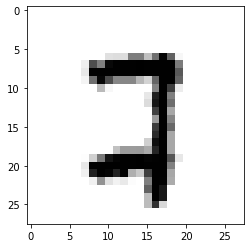

{'y_test': 7, 'y_predict': 2}


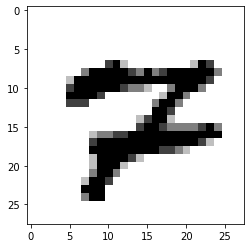

{'y_test': 2, 'y_predict': 7}


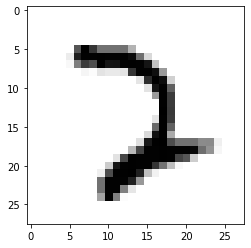

{'y_test': 7, 'y_predict': 2}


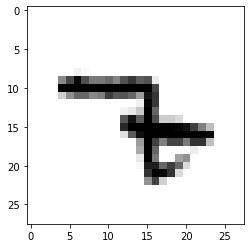

{'y_test': 2, 'y_predict': 7}


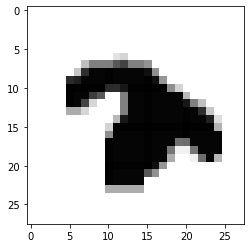

{'y_test': 7, 'y_predict': 2}


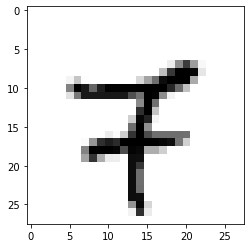

{'y_test': 7, 'y_predict': 2}


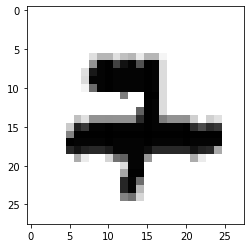

{'y_test': 7, 'y_predict': 2}


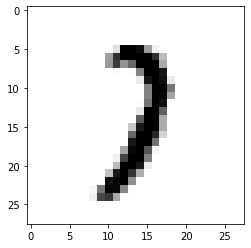

{'y_test': 2, 'y_predict': 7}


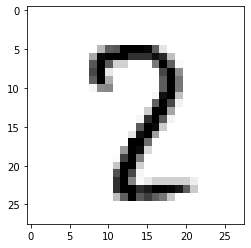

{'y_test': 7, 'y_predict': 2}


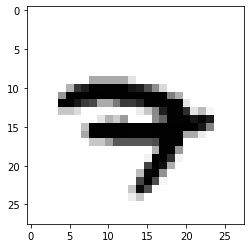

{'y_test': 7, 'y_predict': 2}


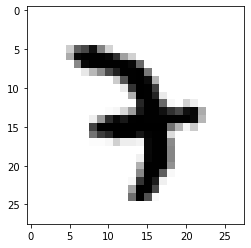

{'y_test': 7, 'y_predict': 2}


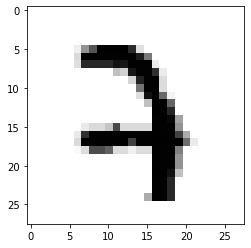

{'y_test': 7, 'y_predict': 2}


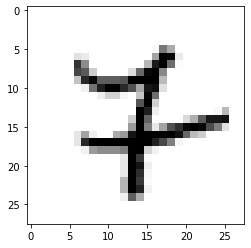

{'y_test': 7, 'y_predict': 2}


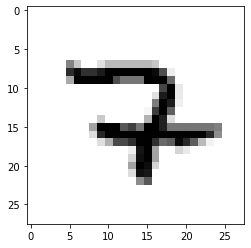

{'y_test': 7, 'y_predict': 2}


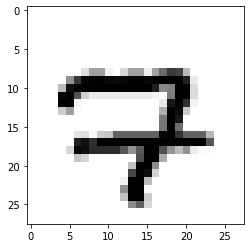

{'y_test': 7, 'y_predict': 2}


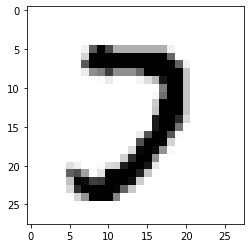

{'y_test': 2, 'y_predict': 7}


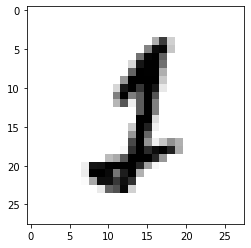

{'y_test': 7, 'y_predict': 2}


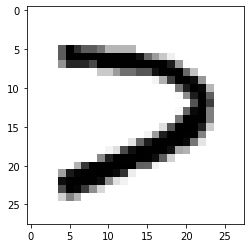

{'y_test': 7, 'y_predict': 2}


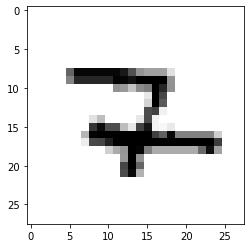

{'y_test': 7, 'y_predict': 2}


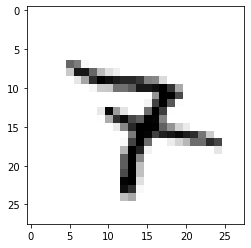

In [6]:
# Check validity of clustering
y_df = pd.DataFrame({'y_test' : ysmall, 'y_predict' : y_predict})
y_df['y_predict'] = y_df['y_predict'].map({1:2,0:7})
y_df['y_test'] = y_df['y_test'].astype(int)

idx = y_df[~(y_df.y_test==y_df.y_predict)].sample(20).index
for i in idx:
    print(y_df.loc[i].to_dict())
    digit = Xsmall[i].reshape(28,28)
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()